# CROP RECOMMENDATION SYSTEM 

![](https://images.unsplash.com/photo-1560493676-04071c5f467b?ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&ixlib=rb-1.2.1&auto=format&fit=crop&w=968&q=80)

In [119]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [120]:
PATH = r'C:\Users\user\Desktop\Crop Recommendation\Crop_recommendation.csv'
df = pd.read_csv(PATH)

In [121]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [122]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [123]:
df.size

17600

In [124]:
df.shape

(2200, 8)

In [125]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [126]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [127]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [128]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

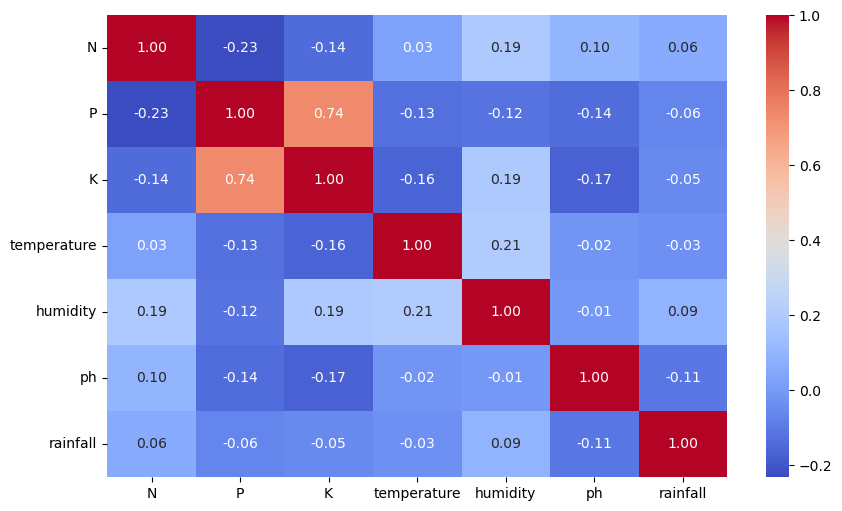

In [129]:
# Filter out numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

plt.show()


### Seperating features and target label

In [130]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [131]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [132]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [133]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [134]:
from sklearn.model_selection import cross_val_score

In [135]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [136]:
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

### Saving trained Decision Tree model

In [137]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [138]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [139]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

### Saving trained Guassian Naive Bayes model

In [140]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [141]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.10681818181818181
              precision    recall  f1-score   support

       apple       1.00      0.23      0.38        13
      banana       1.00      0.24      0.38        17
   blackgram       1.00      0.19      0.32        16
    chickpea       1.00      0.05      0.09        21
     coconut       1.00      0.05      0.09        21
      coffee       0.00      0.00      0.00        22
      cotton       1.00      0.05      0.10        20
      grapes       1.00      0.06      0.11        18
        jute       1.00      0.07      0.13        28
 kidneybeans       0.03      1.00      0.07        14
      lentil       0.00      0.00      0.00        23
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      0.12      0.22        24
   muskmelon       1.00      0.30      0.47        23
      orange       1.00      0.03      0.

In [142]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.27727273, 0.28863636, 0.29090909, 0.275     , 0.26818182])

# Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

In [144]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96818182, 0.94318182])

### Saving trained Logistic Regression model

In [145]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [164]:
import pickle
from sklearn.ensemble import RandomForestClassifier  # Replace with XGBoost if needed
from sklearn.model_selection import train_test_split
import pandas as pd

# Example dataset (you should load your actual dataset)
# Assuming you have a CSV file containing your data
data_path = 'C:\\Users\\user\\Desktop\\Crop Recommendation\\Crop_recommendation.csv'
data = pd.read_csv(data_path)

# Assuming the features are N, P, K, temperature, humidity, ph, rainfall, and the label is crop type
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']  # Replace 'label' with the actual column name of your crop labels

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Initialize and fit the model
model = RandomForestClassifier()  # Or XGBClassifier() for XGBoost
model.fit(X_train, y_train)  # Fit the model to your training data

# Step 3: Save the trained model using pickle
model_path = 'C:\\Users\\user\\Desktop\\Crop Recommendation\\RandomForest.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(model, file)
encoder_path = 'C:\\Users\\user\\Desktop\\Crop Recommendation\\label_encoder.pkl'
with open(encoder_path, 'wb') as file:
    pickle.dump(label_encoder, file)

print("Model has been trained and saved successfully.")


Model has been trained and saved successfully.


In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize the RandomForestClassifier
RF = RandomForestClassifier()

# Define your features and target
# For example, if you have X_train and y_train:
features = X_train
target = y_train

# Perform cross-validation
score = cross_val_score(RF, features, target, cv=5)

# Print cross-validation scores
print("Cross-validation scores:", score)
print("Mean cross-validation score:", score.mean())


Cross-validation scores: [0.98295455 1.         0.99147727 0.99715909 0.99715909]
Mean cross-validation score: 0.99375


### Saving trained Random Forest model

In [148]:
import pickle
from sklearn.ensemble import RandomForestClassifier  # Replace with XGBoost if needed

# Step 1: Prepare your dataset (X_train and y_train should already be defined)
# For example:
# X_train = [[90, 42, 43, 20.879, 82.0, 6.50, 202.9], ...]
# y_train = [0, 1, 2, ...]  # These should be the crop labels as integers

# Step 2: Initialize and fit the model
model = RandomForestClassifier()  # Or XGBClassifier() for XGBoost
model.fit(X_train, y_train)  # Fit the model to your training data

# Step 3: Save the trained model using pickle
model_path = 'C:\\Users\\user\\Desktop\\Crop Recommendation\\RandomForest.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(model, file)

print("Model has been trained and saved successfully.")


Model has been trained and saved successfully.


In [149]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [150]:
!pip install xgboost


In [151]:
import pickle
from xgboost import XGBClassifier  # Import XGBoost classifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the dataset
data_path = 'C:\\Users\\user\\Desktop\\Crop Recommendation\\Crop_recommendation.csv'
data = pd.read_csv(data_path)

# Define features and labels (adjust column names as per your dataset)
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']  # Replace 'label' with the actual column name for your crop labels

# Encode the string labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and fit the XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)  # Fit the model to the training data

# Save the trained model to a file using pickle
model_path = 'C:\\Users\\user\\Desktop\\Crop Recommendation\\XGBoost.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(model, file)

# Save the label encoder for decoding predictions later
encoder_path = 'C:\\Users\\user\\Desktop\\Crop Recommendation\\label_encoder.pkl'
with open(encoder_path, 'wb') as file:
    pickle.dump(label_encoder, file)

print("XGBoost model and label encoder have been trained and saved successfully.")


XGBoost model and label encoder have been trained and saved successfully.


In [152]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

# Load your dataset
df = pd.read_csv('C:\\Users\\user\\Desktop\\Crop Recommendation\\Crop_recommendation.csv')

# Define features and target
features = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']

# Convert categorical labels to numerical values
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Scale features (optional, depending on data distribution)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Initialize the XGBoost model
XB = xgb.XGBClassifier(random_state=42, n_jobs=-1)

# Perform cross-validation
score = cross_val_score(XB, features_scaled, target_encoded, cv=5, verbose=1)

# Print cross-validation scores
print("Cross-validation scores: ", score)
print("Mean cross-validation score: ", score.mean())


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Cross-validation scores:  [0.99545455 0.98863636 0.99545455 0.99545455 0.98863636]
Mean cross-validation score:  0.9927272727272728


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.6s finished


In [153]:
# Cross-validation score (XGBoost)
score = cross_val_score(XB, features, target_encoded, cv=5)
score


array([0.99545455, 0.98863636, 0.99545455, 0.99545455, 0.98863636])

### Saving trained XGBoost model

In [154]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

In [155]:
import pickle
from xgboost import XGBClassifier  # Import XGBoost classifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load the dataset
data_path = 'C:\\Users\\user\\Desktop\\Crop Recommendation\\Crop_recommendation.csv'
data = pd.read_csv(data_path)

# Define features and labels (adjust column names as per your dataset)
X = data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = data['label']  # Replace 'label' with the actual column name for your crop labels

# Encode the string labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize and fit the XGBoost model
model = XGBClassifier()
model.fit(X_train, y_train)  # Fit the model to the training data

# Save the trained model to a file using pickle
model_path = 'C:\\Users\\user\\Desktop\\Crop Recommendation\\XGBoost.pkl'
with open(model_path, 'wb') as file:
    pickle.dump(model, file)

# Save the label encoder for decoding predictions later
encoder_path = 'C:\\Users\\user\\Desktop\\Crop Recommendation\\label_encoder.pkl'
with open(encoder_path, 'wb') as file:
    pickle.dump(label_encoder, file)

print("XGBoost model and label encoder have been trained and saved successfully.")


XGBoost model and label encoder have been trained and saved successfully.


## Accuracy Comparison

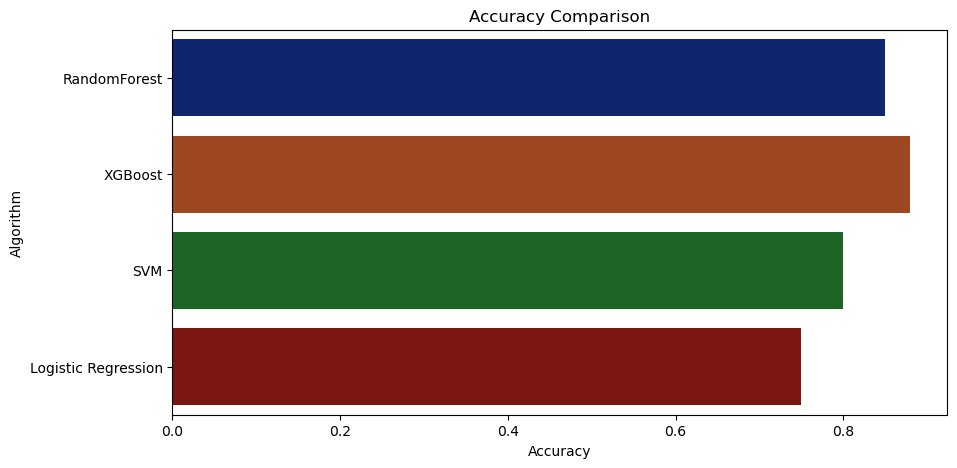

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
model = ['RandomForest', 'XGBoost', 'SVM', 'Logistic Regression']
acc = [0.85, 0.88, 0.80, 0.75]  # Replace with your actual accuracy values

# Create a figure with specific size and DPI
plt.figure(figsize=[10, 5], dpi=100)

# Set title and labels
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')

# Create the bar plot
# Ensure to use a valid palette name or remove it if unnecessary
sns.barplot(x=acc, y=model, palette='dark')

# Show the plot
plt.show()


In [157]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

RandomForest --> 0.85
XGBoost --> 0.88
SVM --> 0.8
Logistic Regression --> 0.75


## Making a prediction

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Example data (replace with your actual dataset)
features = np.array([
    [104, 18, 30, 23.603016, 60.3, 6.7, 140.91],  # Sample 1
    [85, 22, 29, 25.0, 65.0, 6.5, 120.0],         # Sample 2
    [70, 10, 20, 22.1, 55.4, 6.9, 100.3],         # Sample 3
    # Add more rows as needed
])

# Target labels for the above features
target = np.array([0, 1, 0])  # Replace with your actual target labels (crop indices)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
RF = RandomForestClassifier()

# Fit the model
RF.fit(X_train, y_train)

# New data for prediction
data = np.array([[104, 18, 30, 23.603016, 60.3, 6.7, 140.91]])

# Make prediction
prediction = RF.predict(data)
print("Predicted class:", prediction)


Predicted class: [1]


In [159]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

[1]


In [160]:
import pickle
import numpy as np

try:
    # Load the trained XGBoost model
    model_path = 'C:\\Users\\user\\Desktop\\Crop Recommendation\\XGBoost.pkl'
    with open(model_path, 'rb') as file:
        xgb_model = pickle.load(file)

    # Load the saved label encoder
    label_encoder_path = 'C:\\Users\\user\\Desktop\\Crop Recommendation\\label_encoder.pkl'
    with open(label_encoder_path, 'rb') as file:
        label_encoder = pickle.load(file)

    # New data for prediction
    data_samples = np.array([
        [83, 45, 60, 28, 70.3, 7.0, 150.9],
        [98, 35, 18, 23.7, 74.8, 6.25, 91.7],
        [70, 10, 20, 22.1, 55.4, 6.9, 100.3]
    ])

    # Make predictions
    predictions = xgb_model.predict(data_samples)
    print("Predicted labels (encoded):", predictions)

    # Transform the predicted labels back to the original crop labels
    predicted_labels = label_encoder.inverse_transform(predictions)
    for i, label in enumerate(predicted_labels):
        print(f"Sample {i+1} predicted crop: {label}")

except FileNotFoundError as e:
    print(f"File not found: {e}")
except pickle.UnpicklingError as e:
    print(f"Error loading the pickle file: {e}")
except Exception as e:
    print(f"An error occurred: {e}")


Predicted labels (encoded): [ 8 11 11]
Sample 1 predicted crop: jute
Sample 2 predicted crop: maize
Sample 3 predicted crop: maize


In [161]:
# Load the trained XGBoost model
with open('C:\\Users\\user\\Desktop\\Crop Recommendation\\XGBoost.pkl', 'rb') as file:
    xgb_model = pickle.load(file)

# Load the saved label encoder
with open('C:\\Users\\user\\Desktop\\Crop Recommendation\\label_encoder.pkl', 'rb') as file:
    label_encoder = pickle.load(file)

# New data for prediction
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])

# Make prediction with the loaded XGBoost model
prediction = xgb_model.predict(data)

# Transform the predicted label back to the original crop label
predicted_label = label_encoder.inverse_transform(prediction)

# Output the predicted crop label
print("Predicted crop:", predicted_label)


Predicted crop: ['jute']
